In [ ]:
!pip install python-dotenv numpy pandas matplotlib huggingface_hub datasets openai tiktoken

In [15]:
from dotenv import load_dotenv
load_dotenv()

True

In [11]:
from datasets import load_dataset

dataset = load_dataset("LeoTungAnh/electricity_hourly")

In [13]:
import json

with open("few_shots.jsonl", "w") as f:
    for series in dataset["train"]:
        f.write(json.dumps([round(1000*x)/1000 for x in series["target"][:100]])+"\n")

In [57]:
prompt = {"model": "gpt-4-turbo", "temperature": 0.8, "max_tokens": 4096, "messages": [
        {"role": "system", "content": """You are a synthetic data generator, you generate 10 rows similar to the user examples, but not equal.
You output the rows without more comment."""},
        {"role": "user", "content": "\n".join([json.dumps([round(1000*x)/1000 for x in series["target"][:100]]) for series in dataset["train"]][:10])},
]}
print(prompt[ "messages"][1]["content"])

[-0.194, -0.089, -0.194, -0.089, -0.141, -0.141, -0.089, -0.194, -0.456, -0.036, 1.751, 0.7, 0.122, -0.562, 0.7, 1.068, -0.509, 1.015, 1.699, -0.194, 0.437, 2.172, 1.12, 0.7, -0.246, -0.194, -0.246, -0.194, -0.246, -0.299, -0.351, -0.351, 1.383, 1.909, 1.856, 2.434, 2.382, 1.699, 2.645, 1.856, 2.855, 0.647, 1.12, -0.246, 0.858, 0.963, 0.279, 0.91, -0.194, -0.246, -0.194, -0.246, -0.351, -0.299, -0.299, 0.174, 1.856, 1.804, 1.699, 2.014, 2.014, 0.7, 1.015, 2.014, 2.96, -0.036, 2.224, 0.332, 0.858, 2.066, 0.858, 1.331, -0.089, -0.036, -0.141, -0.089, -0.141, -0.194, -0.194, 0.174, 1.751, 2.224, 2.54, 2.172, 1.856, 2.277, 0.437, 0.332, 1.751, 3.328, 2.277, 0.174, 0.069, 2.277, 0.647, 0.91, 0.91, 0.91, 0.752, 2.066]
[-0.767, -0.712, -0.739, -0.878, -0.906, -0.878, -0.906, -0.85, -0.878, -0.518, 0.23, 1.365, 1.864, 1.061, 0.174, -0.075, -0.241, -0.186, -0.241, -0.269, 0.119, -0.13, -0.296, -0.629, -0.767, -0.906, -0.961, -0.989, -0.933, -0.878, -0.712, -0.019, 0.147, 0.202, 0.562, 0.479, 0.

In [58]:
from openai import OpenAI

client = OpenAI()

completion = client.chat.completions.create(**prompt)

In [62]:
data = [json.loads(datum) for datum in completion.choices[0].message.content.split("\n")[:-1]]
print(data)

[[-0.175, -0.121, -0.238, -0.135, -0.167, -0.129, -0.181, -0.217, -0.374, -0.056, 1.783, 0.712, 0.154, -0.534, 0.679, 1.102, -0.521, 1.034, 1.654, -0.186, 0.425, 2.189, 1.112, 0.687, -0.257, -0.178, -0.243, -0.208, -0.259, -0.312, -0.368, -0.367, 1.397, 1.925, 1.843, 2.448, 2.372, 1.685, 2.657, 1.871, 2.841, 0.633, 1.131, -0.232, 0.872, 0.952, 0.288, 0.902, -0.208, -0.239, -0.202, -0.257, -0.345, -0.288, -0.31, 0.168, 1.842, 1.798, 1.71, 2.023, 2.001, 0.712, 1.024, 2.004, 2.971, -0.041, 2.219, 0.322, 0.845, 2.054, 0.867, 1.32, -0.098, -0.052, -0.137, -0.081, -0.156, -0.198, -0.187, 0.167, 1.765, 2.21, 2.556, 2.185, 1.843, 2.263, 0.446, 0.339, 1.763, 3.315, 2.268, 0.19, 0.063, 2.29, 0.658, 0.923, 0.891, 0.929, 0.759, 2.072], [-0.753, -0.698, -0.729, -0.868, -0.916, -0.872, -0.906, -0.842, -0.888, -0.502, 0.245, 1.379, 1.857, 1.052, 0.167, -0.069, -0.231, -0.192, -0.257, -0.279, 0.113, -0.124, -0.302, -0.623, -0.759, -0.892, -0.961, -0.987, -0.939, -0.872, -0.706, -0.013, 0.142, 0.198, 0

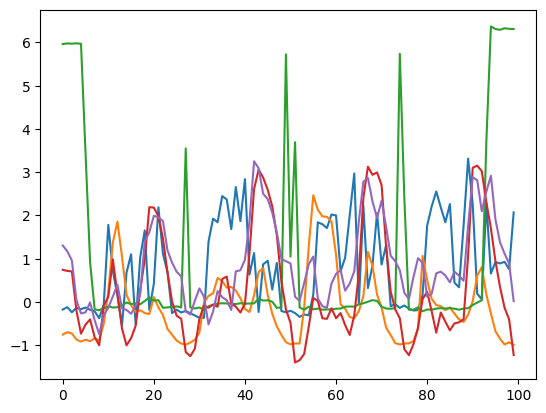

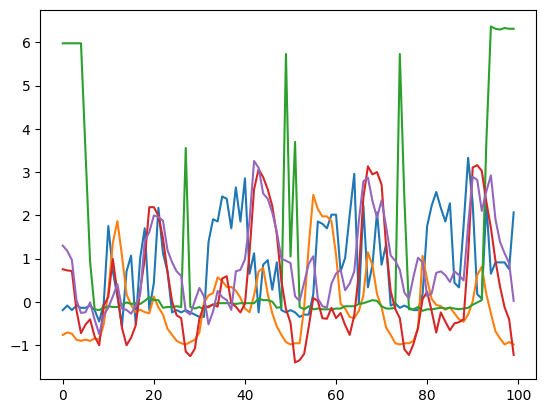

In [61]:
import matplotlib.pyplot as plt

for series in data[:5]:
    plt.plot(series)
plt.show()

for series in list(dataset["train"])[:5]:
    plt.plot(series["target"][:100])
plt.show()

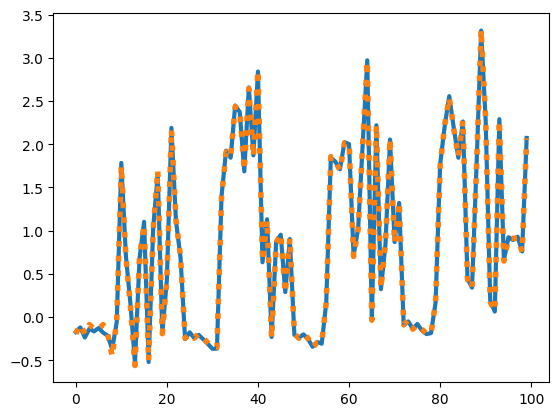

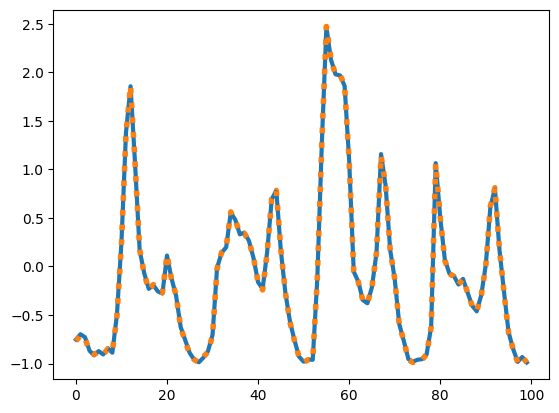

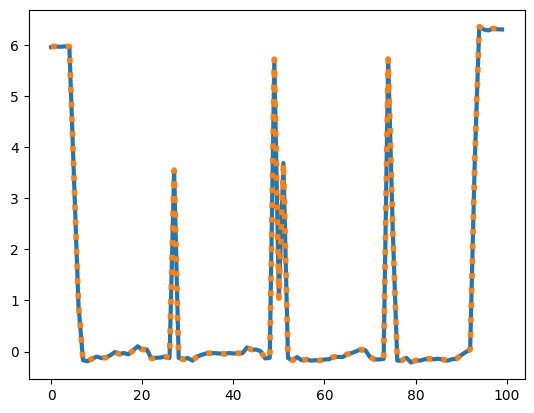

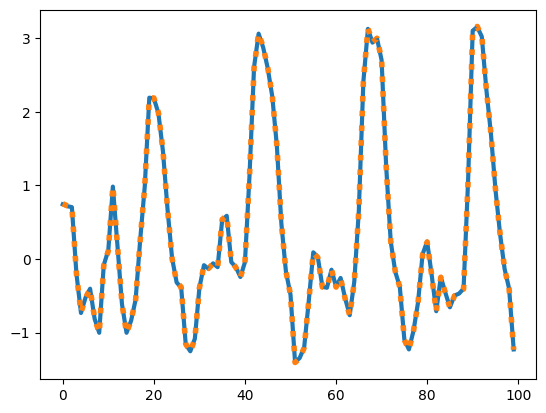

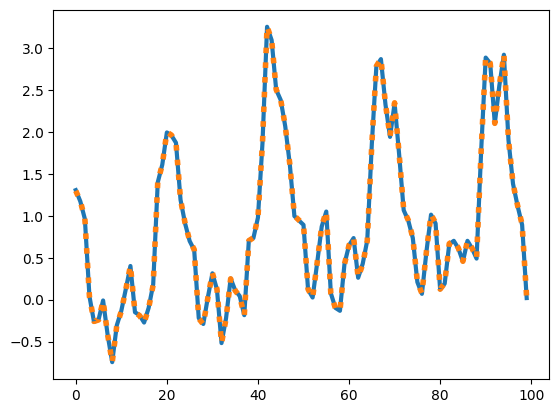

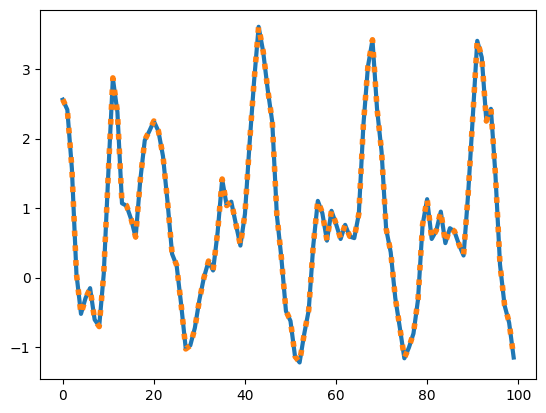

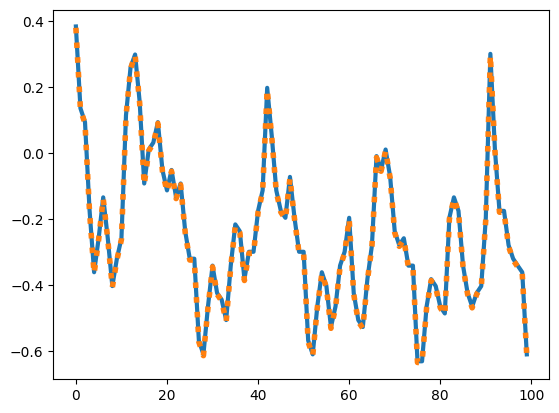

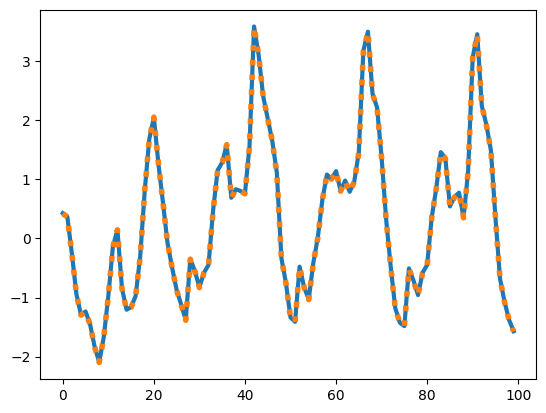

In [69]:
for a,b in zip(data[:10], [series["target"][:100] for series in list(dataset["train"])[:10]]):
    plt.plot(a, linewidth=3)
    plt.plot(b, linewidth=4, linestyle="dotted")
    plt.show()
